In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from utils_for_feature_engineering import *
from catboost import CatBoostClassifier, CatBoostRegressor
import utils_for_feature_engineering
import importlib
import warnings
warnings.simplefilter(action="ignore")




In [444]:
df = pd.read_csv('./datasets/hitters.csv')

check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### # of Unique vl. #####################
AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64
##################### Head ################

In [445]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [446]:
importlib.reload(utils_for_feature_engineering)

cat_cols, num_cols, cat_but_car = grab_columns(df)

cat_cols

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


['League', 'Division', 'NewLeague']

In [447]:
df["AtBat"].dtype in ["object", "bool", "category"]

False

In [448]:
for col in cat_cols:
    print(df.groupby(col).agg({"Salary": ["mean", "median", "count"]}))

            Salary             
              mean median count
League                         
A       541.999547  400.0   139
N       529.117500  450.0   124
              Salary               
                mean   median count
Division                           
E         624.271364  517.143   129
W         450.876873  375.000   134
               Salary             
                 mean median count
NewLeague                         
A          537.113028  400.0   141
N          534.553852  462.5   122


count    322.000000
mean     380.928571
std      153.404981
min       16.000000
5%       161.000000
10%      194.100000
20%      221.800000
30%      281.300000
40%      321.800000
50%      379.500000
60%      430.200000
70%      490.000000
80%      535.600000
90%      584.900000
95%      609.900000
99%      658.590000
max      687.000000
Name: AtBat, dtype: float64


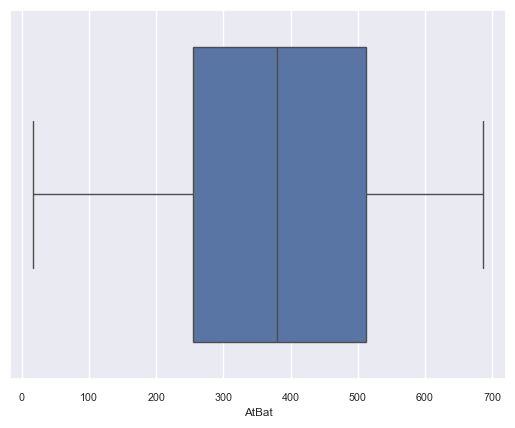

count    322.000000
mean     101.024845
std       46.454741
min        1.000000
5%        39.000000
10%       45.100000
20%       57.000000
30%       70.000000
40%       82.000000
50%       96.000000
60%      113.000000
70%      128.700000
80%      144.000000
90%      163.000000
95%      174.000000
99%      210.790000
max      238.000000
Name: Hits, dtype: float64


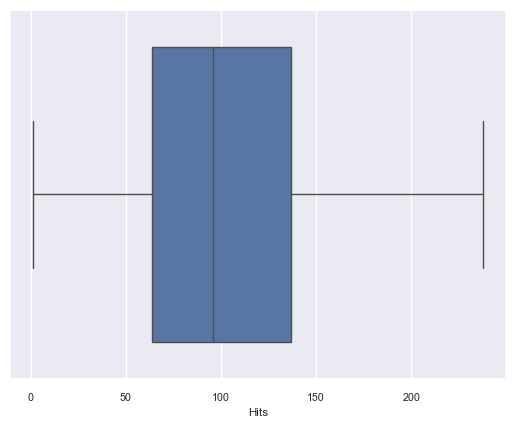

count    322.000000
mean      10.770186
std        8.709037
min        0.000000
5%         0.000000
10%        1.000000
20%        3.000000
30%        5.000000
40%        6.000000
50%        8.000000
60%       10.600000
70%       14.000000
80%       18.000000
90%       24.000000
95%       28.950000
99%       33.000000
max       40.000000
Name: HmRun, dtype: float64


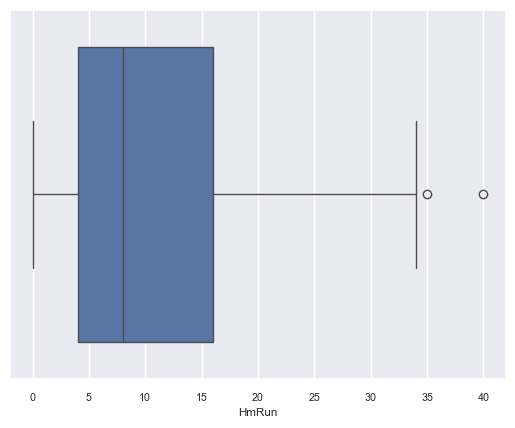

count    322.000000
mean      50.909938
std       26.024095
min        0.000000
5%        17.000000
10%       20.100000
20%       27.000000
30%       33.000000
40%       41.000000
50%       48.000000
60%       55.600000
70%       66.000000
80%       75.800000
90%       89.000000
95%       94.000000
99%      107.790000
max      130.000000
Name: Runs, dtype: float64


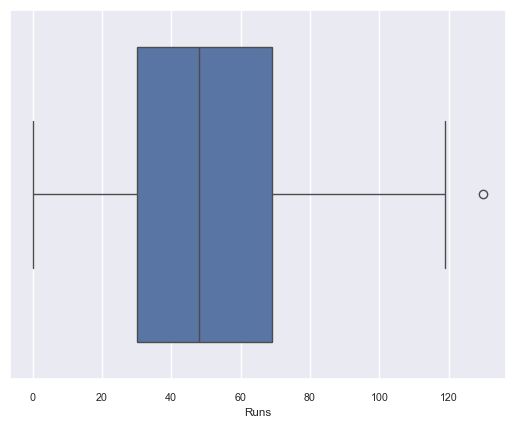

count    322.000000
mean      48.027950
std       26.166895
min        0.000000
5%        14.000000
10%       19.000000
20%       26.000000
30%       30.000000
40%       36.400000
50%       44.000000
60%       49.000000
70%       58.000000
80%       73.000000
90%       86.000000
95%       96.000000
99%      112.370000
max      121.000000
Name: RBI, dtype: float64


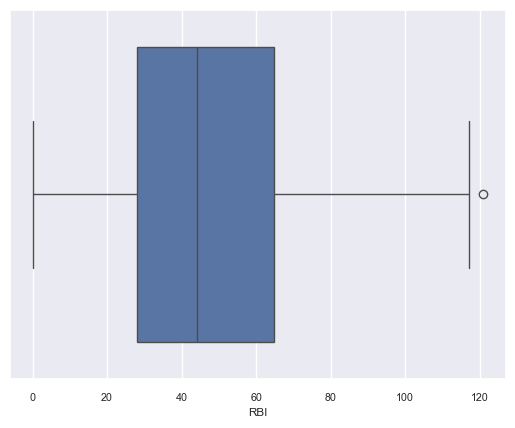

count    322.000000
mean      38.742236
std       21.639327
min        0.000000
5%        11.050000
10%       15.000000
20%       20.000000
30%       24.000000
40%       30.000000
50%       35.000000
60%       40.000000
70%       48.700000
80%       59.000000
90%       69.900000
95%       78.000000
99%       93.580000
max      105.000000
Name: Walks, dtype: float64


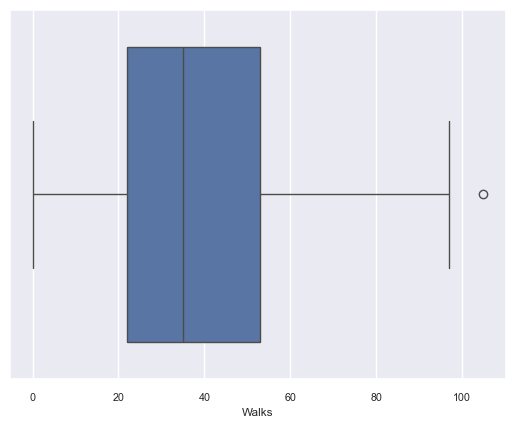

count    322.000000
mean       7.444099
std        4.926087
min        1.000000
5%         1.000000
10%        2.000000
20%        3.000000
30%        4.000000
40%        5.000000
50%        6.000000
60%        7.600000
70%       10.000000
80%       12.000000
90%       15.000000
95%       17.000000
99%       19.790000
max       24.000000
Name: Years, dtype: float64


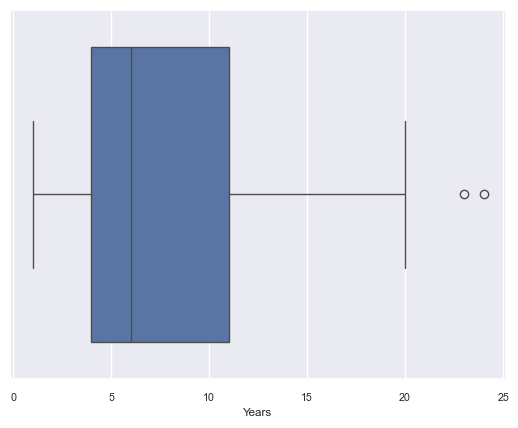

count      322.00000
mean      2648.68323
std       2324.20587
min         19.00000
5%         216.50000
10%        342.20000
20%        667.60000
30%        963.40000
40%       1402.20000
50%       1928.00000
60%       2654.00000
70%       3365.00000
80%       4483.00000
90%       6123.40000
95%       7125.60000
99%       8749.97000
max      14053.00000
Name: CAtBat, dtype: float64


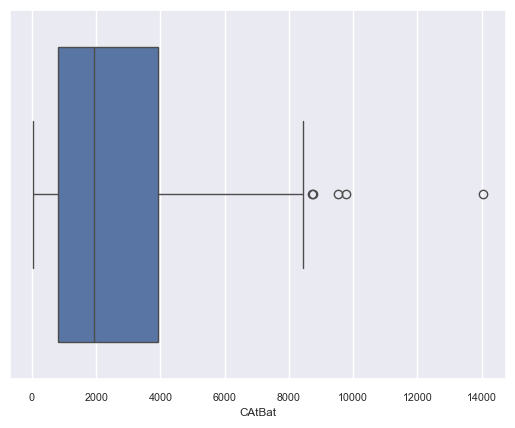

count     322.000000
mean      717.571429
std       654.472627
min         4.000000
5%         54.000000
10%        86.000000
20%       164.600000
30%       238.000000
40%       355.800000
50%       508.000000
60%       708.200000
70%       911.100000
80%      1229.200000
90%      1659.600000
95%      2017.150000
99%      2500.340000
max      4256.000000
Name: CHits, dtype: float64


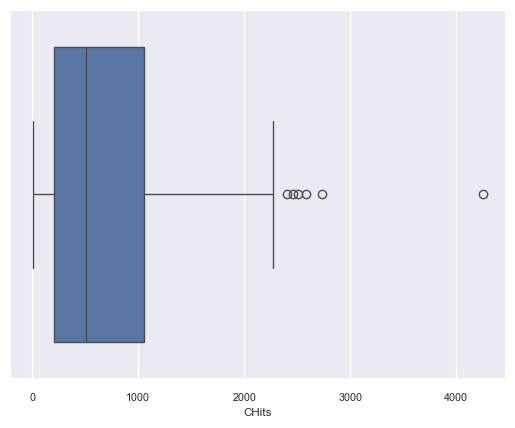

count    322.000000
mean      69.490683
std       86.266061
min        0.000000
5%         2.000000
10%        4.000000
20%       10.200000
30%       16.300000
40%       27.400000
50%       37.500000
60%       51.200000
70%       72.400000
80%      103.800000
90%      194.900000
95%      265.650000
99%      373.120000
max      548.000000
Name: CHmRun, dtype: float64


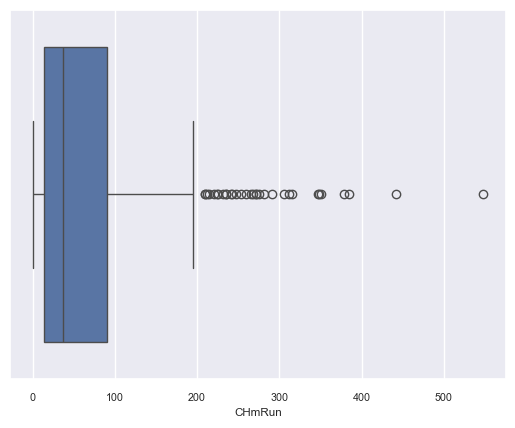

count     322.000000
mean      358.795031
std       334.105886
min         1.000000
5%         27.000000
10%        38.100000
20%        80.400000
30%       117.300000
40%       181.000000
50%       247.000000
60%       333.000000
70%       443.400000
80%       627.200000
90%       895.700000
95%      1032.300000
99%      1174.370000
max      2165.000000
Name: CRuns, dtype: float64


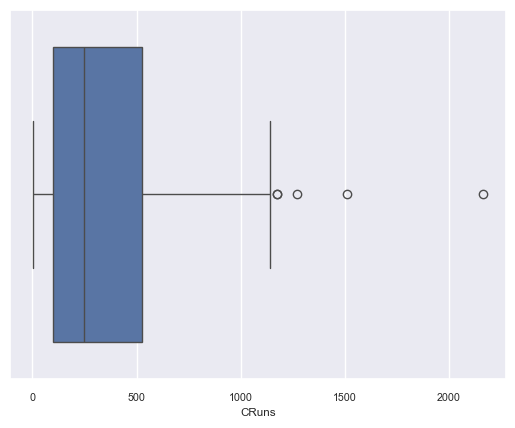

count     322.000000
mean      330.118012
std       333.219617
min         0.000000
5%         22.050000
10%        34.100000
20%        70.200000
30%       106.300000
40%       149.000000
50%       220.500000
60%       303.600000
70%       379.100000
80%       496.200000
90%       861.600000
95%      1071.750000
99%      1310.850000
max      1659.000000
Name: CRBI, dtype: float64


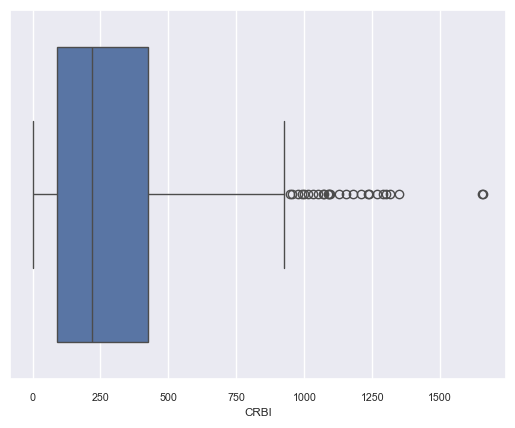

count     322.000000
mean      260.239130
std       267.058085
min         0.000000
5%         15.050000
10%        30.100000
20%        55.000000
30%        82.000000
40%       117.400000
50%       170.500000
60%       226.600000
70%       300.700000
80%       421.000000
90%       643.900000
95%       817.600000
99%      1139.140000
max      1566.000000
Name: CWalks, dtype: float64


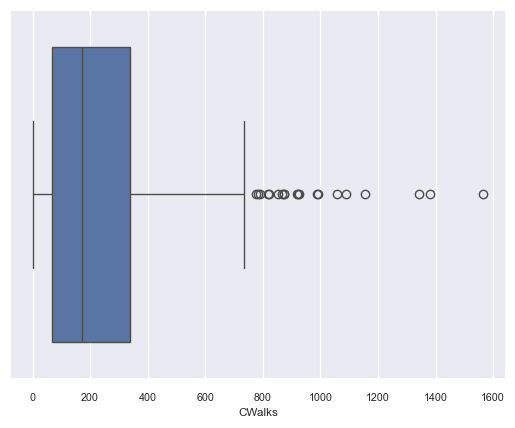

count     322.000000
mean      288.937888
std       280.704614
min         0.000000
5%         33.200000
10%        62.200000
20%        99.600000
30%       132.000000
40%       167.000000
50%       212.000000
60%       257.400000
70%       303.000000
80%       365.800000
90%       685.600000
95%       910.650000
99%      1301.190000
max      1378.000000
Name: PutOuts, dtype: float64


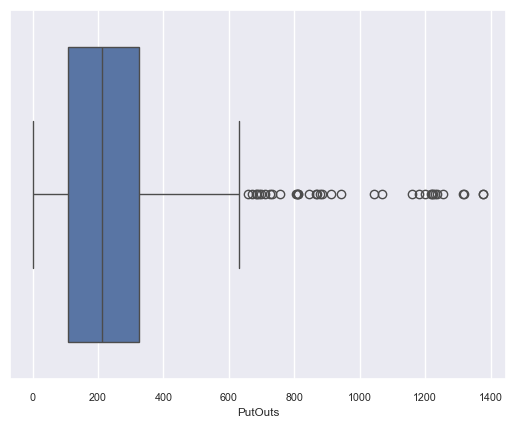

count    322.000000
mean     106.913043
std      136.854876
min        0.000000
5%         0.000000
10%        2.000000
20%        5.200000
30%        9.000000
40%       15.400000
50%       39.500000
60%       76.800000
70%      134.800000
80%      210.800000
90%      353.300000
95%      431.450000
99%      478.160000
max      492.000000
Name: Assists, dtype: float64


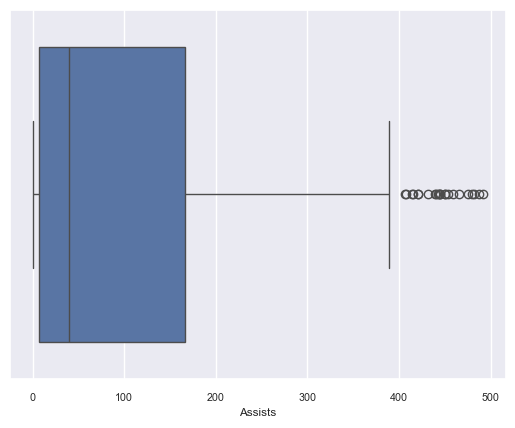

count    322.000000
mean       8.040373
std        6.368359
min        0.000000
5%         0.000000
10%        1.000000
20%        3.000000
30%        4.000000
40%        5.000000
50%        6.000000
60%        8.000000
70%       10.000000
80%       13.000000
90%       17.000000
95%       20.000000
99%       25.790000
max       32.000000
Name: Errors, dtype: float64


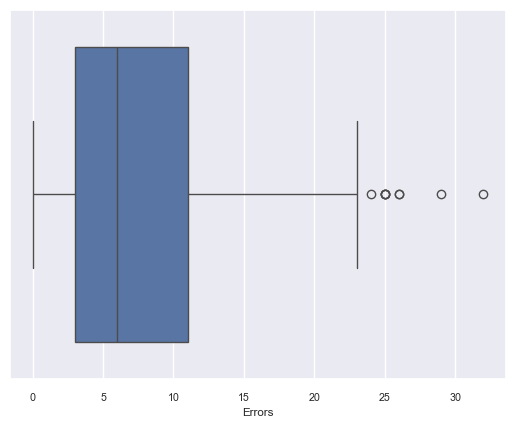

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
5%         86.600000
10%       100.000000
20%       155.000000
30%       221.000000
40%       300.000000
50%       425.000000
60%       538.000000
70%       700.000000
80%       809.000000
90%      1048.666600
95%      1346.000000
99%      2032.886540
max      2460.000000
Name: Salary, dtype: float64


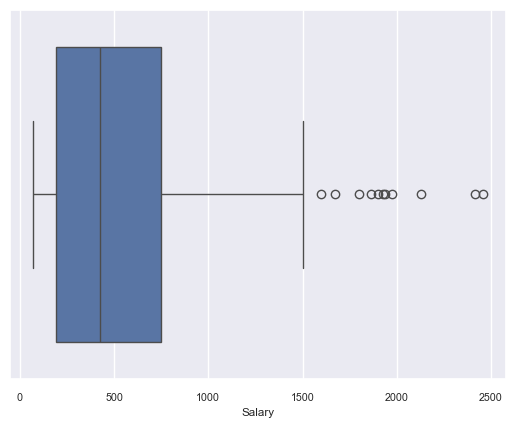

In [449]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [450]:
for col in num_cols:
    print(check_outlier(df, col, 0.05, 0.95))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [451]:
missing_values_table(df)

df.loc[df["Salary"].isnull(), :]

# Missing value analysis

train_data = df[df["Salary"].notna()]
test_data = df[df["Salary"].isnull()]

x_train = train_data.drop("Salary", axis=1)
y_train = train_data["Salary"]


catboost_model = CatBoostRegressor(cat_features=cat_cols, verbose=True, random_seed=42)
catboost_model.fit(x_train, y_train)

df.loc[df["Salary"].isna(), "Salary"] = catboost_model.predict(test_data.drop("Salary", axis=1))


check_df(df)

        n_miss  ratio
Salary      59  18.32
Learning rate set to 0.033154
0:	learn: 444.3128416	total: 3.22ms	remaining: 3.22s
1:	learn: 436.7483571	total: 5.08ms	remaining: 2.54s
2:	learn: 430.9251622	total: 7.24ms	remaining: 2.4s
3:	learn: 424.8538304	total: 9.21ms	remaining: 2.29s
4:	learn: 418.5345548	total: 10.9ms	remaining: 2.17s
5:	learn: 412.9829206	total: 12.9ms	remaining: 2.13s
6:	learn: 408.2343631	total: 15.6ms	remaining: 2.21s
7:	learn: 402.7944485	total: 17.9ms	remaining: 2.21s
8:	learn: 397.8793405	total: 19.6ms	remaining: 2.16s
9:	learn: 392.2829917	total: 22ms	remaining: 2.17s
10:	learn: 387.0960894	total: 23.8ms	remaining: 2.14s
11:	learn: 381.7671696	total: 25.8ms	remaining: 2.12s
12:	learn: 376.9710389	total: 27.5ms	remaining: 2.09s
13:	learn: 371.7201157	total: 29.8ms	remaining: 2.1s
14:	learn: 367.6359743	total: 32.5ms	remaining: 2.13s
15:	learn: 362.6295621	total: 34.2ms	remaining: 2.1s
16:	learn: 358.5013680	total: 36.3ms	remaining: 2.1s
17:	learn: 354.4682496	t

In [452]:
binary_cols = binary_cols(df)

df = label_encoder(df, binary_cols)

df.dtypes

cat_cols, num_cols, cat_but_car = grab_columns(df)


Observations: 322
Variables: 20
cat_cols: 0
num_cols: 20
cat_but_car: 0
num_but_cat: 0


In [453]:
# Correlation Analysis

f,ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df[num_cols].corr().abs(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap="YlGnBu")
ax.set_title("Correlation Matrix", fontsize=20) 
plt.show()

In [454]:
# Analysis After Removal of Correlated Variables
corr_df = df[num_cols].corr()


upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool_))
upper_triangle

drop_list = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]

drop_list

temp_df = df.copy()

temp_df.drop(drop_list, axis=1, inplace=True)
corr_temp = temp_df.corr().abs()

f,ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr_temp, annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap="YlGnBu")
ax.set_title("Correlation Matrix", fontsize=20) 
plt.show()


In [456]:
high_corr_cols = get_high_corr_cols(df,plot=False)

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

### Base Model